In [1]:
import os
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from scipy.stats import linregress

# change the directory to the folder that includes all the JRA reanalysis datasets
dir_jra_wind = r'C:\Users\xliu38\OneDrive - University of Tasmania\Honours Research Project\Matlab code for Meander analysis\CP_wind_speed_data'
os.chdir(dir_jra_wind)

In [2]:
# Open the four datasets for the initial analysis

jra_ugrd = xr.open_dataset('jra.55.ugrd.sfc.1958010100_2021123118.lon_150_210.lat_60S_45S.nc')
jra_vgrd = xr.open_dataset('jra.55.vgrd.sfc.1958010100_2021123118.lon_150_210.lat_60S_45S.nc')
jra_ugrd_tre = xr.open_dataset('jra.55.ugrd.sfc.1993010100_2021123118.lon_150_210.lat_60S_45S.trend_slope.nc')
jra_vgrd_tre = xr.open_dataset('jra.55.vgrd.sfc.1993010100_2021123118.lon_150_210.lat_60S_45S.trend_slope.nc')

In [3]:
jra_ugrd

<xarray.Dataset>
Dimensions:                   (initial_time0_hours: 23376, bnds: 2, g0_lon_2: 49, g0_lat_1: 13)
Coordinates:
  * initial_time0_hours       (initial_time0_hours) datetime64[ns] 1958-01-01...
  * g0_lon_2                  (g0_lon_2) float32 150.0 151.2 ... 208.8 210.0
  * g0_lat_1                  (g0_lat_1) float32 -45.0 -46.25 ... -58.75 -60.0
Dimensions without coordinates: bnds
Data variables:
    initial_time0_hours_bnds  (initial_time0_hours, bnds) datetime64[ns] ...
    UGRD_GDS0_HTGL            (initial_time0_hours, g0_lat_1, g0_lon_2) float32 ...
    initial_time0_encoded     (initial_time0_hours) float64 ...
Attributes:
    CDI:            Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:    None
    history:        Thu Jun 01 17:01:27 2023: cdo sellonlatbox,150,210,-60,-4...
    creation_date:  Thu Mar  5 15:15:28 MST 2020
    NCL_Version:    6.6.2
    system:         Linux casper17 3.10.0-693.21.1.el7.x86_64 #1 SMP Wed Mar ...
    grib_source:    anl_surf125.033_ugrd.1958010100_1958123118.monselesan4120...
    title:          NCL: convert-GRIB-to-netCDF
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

In [4]:
jra_ugrd_time_hr = jra_ugrd.initial_time0_hours
jra_ugrd_time_day = jra_ugrd_time_hr.values.astype('datetime64[D]')
jra_ugrd_lon = jra_ugrd.g0_lon_2
jra_ugrd_lat = jra_ugrd.g0_lat_1
jra_ugrd_wind = jra_ugrd.UGRD_GDS0_HTGL

jra_vgrd_time_hr = jra_vgrd.initial_time0_hours
jra_vgrd_time_day = jra_vgrd_time_hr.values.astype('datetime64[D]')
jra_vgrd_lon = jra_vgrd.g0_lon_2
jra_vgrd_lat = jra_vgrd.g0_lat_1
jra_vgrd_wind = jra_vgrd.VGRD_GDS0_HTGL

jra_ugrd_tre_time_hr = jra_ugrd_tre.initial_time0_hours
jra_ugrd_tre_time_day = jra_ugrd_tre_time_hr.values.astype('datetime64[D]')
jra_ugrd_tre_lon = jra_ugrd_tre.g0_lon_2
jra_ugrd_tre_lat = jra_ugrd_tre.g0_lat_1
jra_ugrd_tre_wind = jra_ugrd_tre.UGRD_GDS0_HTGL

jra_vgrd_tre_time_hr = jra_vgrd_tre.initial_time0_hours
jra_vgrd_tre_time_day = jra_vgrd_tre_time_hr.values.astype('datetime64[D]')
jra_vgrd_tre_lon = jra_vgrd_tre.g0_lon_2
jra_vgrd_tre_lat = jra_vgrd_tre.g0_lat_1
jra_vgrd_tre_wind = jra_vgrd_tre.VGRD_GDS0_HTGL

In [5]:
jra_ugrd_wind

<xarray.DataArray 'UGRD_GDS0_HTGL' (initial_time0_hours: 23376, g0_lat_1: 13, g0_lon_2: 49)>
[14890512 values with dtype=float32]
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 1958-01-01T09:0...
  * g0_lon_2             (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0
  * g0_lat_1             (g0_lat_1) float32 -45.0 -46.25 -47.5 ... -58.75 -60.0
Attributes:
    long_name:                u-component of wind
    units:                    m/s
    forecast_time_units:      hours
    forecast_time:            0
    level:                    10
    parameter_number:         33
    parameter_table_version:  200
    gds_grid_type:            0
    level_indicator:          105
    center:                   Japanese Meteorological Agency - Tokyo (RSMC)
    sub_center:               241

In [6]:
# Define the longitude and latitude ranges
lon_CP = [150, 210]
lat_CP = [-70, -30]

lon_CP_west = lon_CP[0]
lon_CP_east = lon_CP[1]
lat_CP_south = lat_CP[0]
lat_CP_north = lat_CP[1]

x_months = 4

In [7]:
lat_CP_region = [-57, -46]

lat_CP_region_south = lat_CP_region[0]
lat_CP_region_north = lat_CP_region[1]

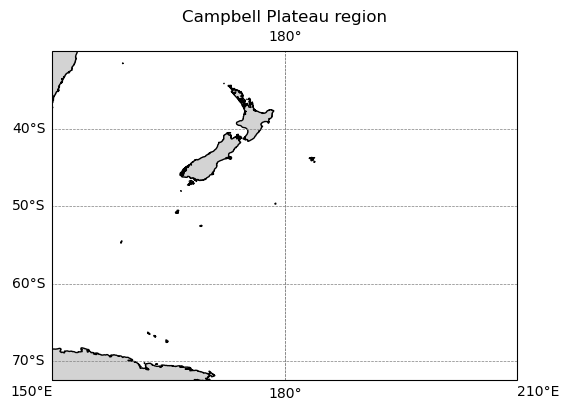

In [8]:
# Create a plot of the local Campbell Plateau region
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Set the map extent
ax.set_extent([lon_CP_west, lon_CP_east, lat_CP_south, lat_CP_north])

# Add coastlines and land
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')

# Add annotations for longitude boundaries
ax.text(lon_CP_west, -73, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax.text(lon_CP_east, -73, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Add a title
plt.title('Campbell Plateau region')

# Show the plot
plt.show()

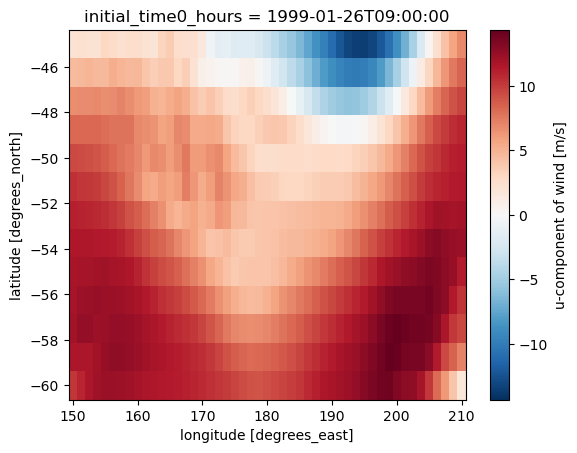

In [9]:
jra_ugrd_wind.isel(initial_time0_hours = 15000).plot()

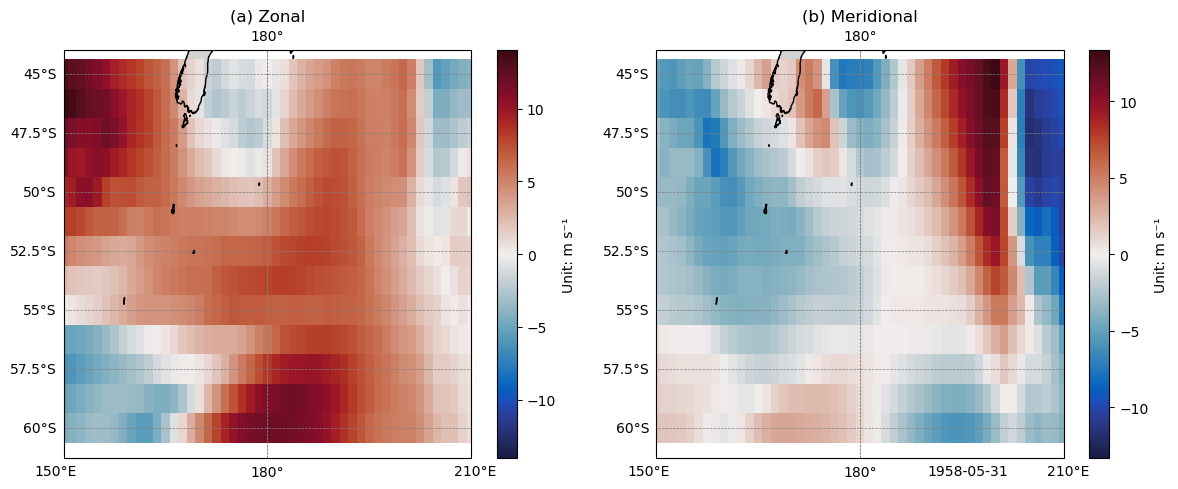

In [10]:
# Plot the daily zonal and meridional wind speeds

u_component = jra_ugrd_wind.isel(initial_time0_hours=0)
v_component = jra_vgrd_wind.isel(initial_time0_hours=0)

fig = plt.figure(figsize=(12, 5))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

u_component.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Unit: m s⁻¹'})
ax1.set_title('(a) Zonal')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Meridional component of the wind velocities
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

v_component.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Unit: m s⁻¹'})
ax2.set_title('(b) Meridional')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Adjust the layout
plt.tight_layout()

# Show the time of the wind field
date_str = str(jra_ugrd_time_hr.values[150].astype('datetime64[D]'))
ax2.text(lon_CP_east-20, -61.5, date_str, transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_{date_str}_daily_zonal_meridional_wind_speeds.png', dpi=600)

In [11]:
jra_ugrd_tre_wind

<xarray.DataArray 'UGRD_GDS0_HTGL' (initial_time0_hours: 1, g0_lat_1: 13, g0_lon_2: 49)>
array([[[ 0.00107 ,  0.000946, ...,  0.005479,  0.006353],
        [-0.00116 , -0.001875, ...,  0.005644,  0.006183],
        ...,
        [ 0.005256,  0.0056  , ...,  0.014065,  0.013747],
        [ 0.007301,  0.00774 , ...,  0.013203,  0.012693]]])
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 1993-12-31T09:0...
  * g0_lon_2             (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0
  * g0_lat_1             (g0_lat_1) float32 -45.0 -46.25 -47.5 ... -58.75 -60.0
Attributes:
    long_name:                u-component of wind
    units:                    m/s
    forecast_time_units:      hours
    forecast_time:            0
    level:                    10
    parameter_number:         33
    parameter_table_version:  200
    gds_grid_type:            0
    level_indicator:          105
    center:                   Japanese Meteorological Agency - Tokyo (RSMC)
    sub_center:               241

In [12]:
jra_ugrd_tre

<xarray.Dataset>
Dimensions:                   (initial_time0_hours: 1, bnds: 2, g0_lon_2: 49, g0_lat_1: 13)
Coordinates:
  * initial_time0_hours       (initial_time0_hours) datetime64[ns] 1993-12-31...
  * g0_lon_2                  (g0_lon_2) float32 150.0 151.2 ... 208.8 210.0
  * g0_lat_1                  (g0_lat_1) float32 -45.0 -46.25 ... -58.75 -60.0
Dimensions without coordinates: bnds
Data variables:
    initial_time0_hours_bnds  (initial_time0_hours, bnds) datetime64[ns] ...
    UGRD_GDS0_HTGL            (initial_time0_hours, g0_lat_1, g0_lon_2) float64 ...
    initial_time0_encoded     (initial_time0_hours) float64 ...
Attributes:
    CDI:            Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:    None
    history:        Thu Jun 01 17:09:55 2023: cdo trend jra.55.ugrd.sfc.19930...
    creation_date:  Thu Mar  5 15:15:28 MST 2020
    NCL_Version:    6.6.2
    system:         Linux casper17 3.10.0-693.21.1.el7.x86_64 #1 SMP Wed Mar ...
    grib_source:    anl_surf125.033_ugrd.1958010100_1958123118.monselesan4120...
    title:          NCL: convert-GRIB-to-netCDF
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

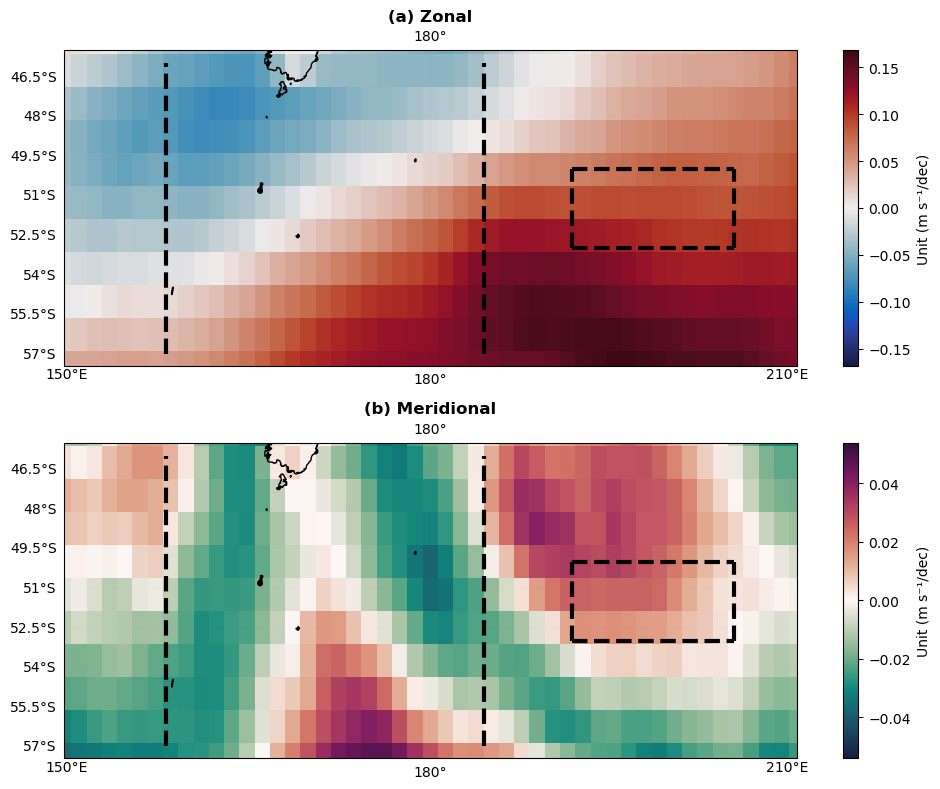

In [13]:
# Plot the trend slope of the zonal and meridional wind components

fig = plt.figure(figsize=(10, 8))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3, lat_CP_region_north+0.5])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.01, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Transform the trend to the decadal one
jra_ugrd_tre_wind_dec = jra_ugrd_tre_wind*10

jra_ugrd_tre_wind_dec.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹/dec)'})
ax1.set_title('(a) Zonal', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax1.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax1.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax1.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream


# Meridional component of the wind velocities
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3, lat_CP_region_north+0.5])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.01, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Transform the trend to the decadal one
jra_vgrd_tre_wind_dec = jra_vgrd_tre_wind*10

jra_vgrd_tre_wind_dec.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.curl', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹/dec)'})
ax2.set_title('(b) Meridional', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax2.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax2.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax2.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Adjust the layout
plt.tight_layout()

# Show the time of the wind field
#date_str_tre = str(jra_ugrd_tre_time_hr.values[0].astype('datetime64[Y]'))
#ax2.text(lon_CP_east-20, -61.5, date_str_tre, transform=ccrs.PlateCarree(), ha='left', va='top', color='black', fontweight='bold')

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_region_1993_2021_zonal_meridional_wind_speed_trends.png', dpi=600)

In [15]:
jra_ugrd_time_hr

<xarray.DataArray 'initial_time0_hours' (initial_time0_hours: 23376)>
array(['1958-01-01T09:00:00.000000000', '1958-01-02T09:00:00.000000000',
       '1958-01-03T09:00:00.000000000', ..., '2021-12-29T09:00:00.000000000',
       '2021-12-30T09:00:00.000000000', '2021-12-31T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 1958-01-01T09:0...
Attributes:
    standard_name:  time
    long_name:      initial time
    bounds:         initial_time0_hours_bnds
    axis:           T

In [14]:
# Transform the jra_ugrd_time_day (daily variable) from the datetime format to the number format
jra_ugrd_time_day_num = jra_ugrd_time_day.astype('int')

# Add the beginning boundary time value of 1970-01-01 to the original time series
ordinal_1970_01_01 = datetime(1970, 1, 1).toordinal()
jra_ugrd_time_day_num = jra_ugrd_time_day_num + ordinal_1970_01_01

# jra_ugrd_time_day_num

In [15]:
jra_ugrd_time_day_num

array([714780, 714781, 714782, ..., 738153, 738154, 738155])

In [16]:
# Define the monthly timeseries starting from the 15th of the first month
# to 15th of the last months of data
tim_tran = []

# Convert jra_ugrd_time_hr_start_time and jra_ugrd_time_hr_end_time to datetime objects
jra_ugrd_time_start_mon = datetime.fromordinal(jra_ugrd_time_day_num[0]+14)
jra_ugrd_time_end_mon = datetime.fromordinal(jra_ugrd_time_day_num[-1])

# Generate monthly datetime range
jra_ugrd_time_current_mon = jra_ugrd_time_start_mon

while jra_ugrd_time_current_mon <= jra_ugrd_time_end_mon:
    tim_tran.append(jra_ugrd_time_current_mon)
    jra_ugrd_time_current_mon = jra_ugrd_time_current_mon + timedelta(days=30)
    
tim_tran_mon = [date.strftime('%Y-%m') for date in tim_tran]
#tim_tran_day = [date.strftime('%Y-%m-%d') for date in tim_tran]
#tim_tran_yr = [date.strftime('%Y') for date in tim_tran]

for time in tim_tran_mon:
    print(time)

1958-01
1958-02
1958-03
1958-04
1958-05
1958-06
1958-07
1958-08
1958-09
1958-10
1958-11
1958-12
1959-01
1959-02
1959-03
1959-04
1959-05
1959-06
1959-07
1959-08
1959-09
1959-10
1959-11
1959-12
1960-01
1960-02
1960-03
1960-04
1960-05
1960-06
1960-07
1960-08
1960-09
1960-10
1960-10
1960-11
1960-12
1961-01
1961-02
1961-03
1961-04
1961-05
1961-06
1961-07
1961-08
1961-09
1961-10
1961-11
1961-12
1962-01
1962-02
1962-03
1962-04
1962-05
1962-06
1962-07
1962-08
1962-09
1962-10
1962-11
1962-12
1963-01
1963-02
1963-03
1963-04
1963-05
1963-06
1963-07
1963-08
1963-09
1963-10
1963-11
1963-12
1964-01
1964-02
1964-03
1964-04
1964-05
1964-06
1964-07
1964-08
1964-09
1964-10
1964-11
1964-12
1965-01
1965-02
1965-03
1965-04
1965-05
1965-06
1965-07
1965-08
1965-09
1965-10
1965-11
1965-12
1966-01
1966-02
1966-03
1966-04
1966-05
1966-06
1966-07
1966-08
1966-08
1966-09
1966-10
1966-11
1966-12
1967-01
1967-02
1967-03
1967-04
1967-05
1967-06
1967-07
1967-08
1967-09
1967-10
1967-11
1967-12
1968-01
1968-02
1968-03


In [17]:
# Find the indices of each value in tim_tran in the original jra_ugrd_time_day_num variable
ind_tim_tran = []

for date in tim_tran:
    index = np.where(jra_ugrd_time_day_num == date.toordinal() - 14)[0][0]
    ind_tim_tran.append(index)

print(ind_tim_tran)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, 1110, 1140, 1170, 1200, 1230, 1260, 1290, 1320, 1350, 1380, 1410, 1440, 1470, 1500, 1530, 1560, 1590, 1620, 1650, 1680, 1710, 1740, 1770, 1800, 1830, 1860, 1890, 1920, 1950, 1980, 2010, 2040, 2070, 2100, 2130, 2160, 2190, 2220, 2250, 2280, 2310, 2340, 2370, 2400, 2430, 2460, 2490, 2520, 2550, 2580, 2610, 2640, 2670, 2700, 2730, 2760, 2790, 2820, 2850, 2880, 2910, 2940, 2970, 3000, 3030, 3060, 3090, 3120, 3150, 3180, 3210, 3240, 3270, 3300, 3330, 3360, 3390, 3420, 3450, 3480, 3510, 3540, 3570, 3600, 3630, 3660, 3690, 3720, 3750, 3780, 3810, 3840, 3870, 3900, 3930, 3960, 3990, 4020, 4050, 4080, 4110, 4140, 4170, 4200, 4230, 4260, 4290, 4320, 4350, 4380, 4410, 4440, 4470, 4500, 4530, 4560, 4590, 4620, 4650, 4680, 4710, 4740, 4770, 4800, 4830, 4860, 4890, 4920, 4950, 4980, 5010, 5040, 5070, 5100, 5130, 5160, 

In [18]:
# Convert months into days (nearest even number)
# x_months: Time period over which the mean wind speed field is idenified
x_days = 2*np.floor(x_months*30.417/2)

# For each month: make a running sum of the flag values over x_days 
jra_ugrd_wind_mon_mean = np.full((len(ind_tim_tran), len(jra_ugrd_lat), len(jra_ugrd_lon)), np.nan)
jra_vgrd_wind_mon_mean = np.full((len(ind_tim_tran), len(jra_vgrd_lat), len(jra_vgrd_lon)), np.nan)

# The loop below is used for a running sum of the flag values over x_days
for i in range(int(np.floor(x_months/2+1)), len(ind_tim_tran)-int(np.floor(x_months/2))+1, 1):
    
    jra_ugrd_wind_mon_mean[i, :, :] = np.average(jra_ugrd_wind[ind_tim_tran[i]-int(x_days/2-1):ind_tim_tran[i]+int(x_days/2), :, :], 0)
    
    jra_vgrd_wind_mon_mean[i, :, :] = np.average(jra_vgrd_wind[ind_tim_tran[i]-int(x_days/2-1):ind_tim_tran[i]+int(x_days/2), :, :], 0)

In [19]:
np.shape(jra_vgrd_wind_mon_mean)

(779, 13, 49)

In [20]:
np.shape(jra_ugrd_wind)

(23376, 13, 49)

In [21]:
print(type(jra_vgrd_wind_mon_mean))

<class 'numpy.ndarray'>


In [22]:
# Convert the derived monthly mean and v_component_mon to xarray DataArrays
jra_ugrd_wind_mon_mean = xr.DataArray(jra_ugrd_wind_mon_mean)
jra_vgrd_wind_mon_mean = xr.DataArray(jra_vgrd_wind_mon_mean)

jra_ugrd_wind_mon_mean

<xarray.DataArray (dim_0: 779, dim_1: 13, dim_2: 49)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [6.32325077, 6.51058674, 6.74056292, ..., 9.05280018,
         9.05493355, 9.03917694],
        [6.16010761, 6.38607931, 6.61743402, ..., 8.75884628,
         8.72789192, 8.68554688],
        [6.03136539, 6.27992105, 6.49847412, ..., 8.306674  ,
         8.26209641, 8.19677353]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

In [23]:
# Remove the second and third dimensions of the monthly mean wind speed variables; Add new coordinates and attributes
# Three coordinates: initial_time1_months g0_lat_1 g0_lon_2
jra_ugrd_wind_mon_mean = jra_ugrd_wind_mon_mean.assign_coords(
    dict(
        initial_time1_months=("dim_0", tim_tran_mon),
        g0_lat_1=("dim_1", jra_ugrd.g0_lat_1.data),
        g0_lon_2=("dim_2", jra_ugrd.g0_lon_2.data)
    )
)

jra_ugrd_wind_mon_mean = jra_ugrd_wind_mon_mean.rename(
    {"dim_0": "initial_time1_months", "dim_1": "g0_lat_1", "dim_2": "g0_lon_2"}
)

jra_vgrd_wind_mon_mean = jra_vgrd_wind_mon_mean.assign_coords(
    dict(
        initial_time1_months=("dim_0", tim_tran_mon),
        g0_lat_1=("dim_1", jra_ugrd.g0_lat_1.data),
        g0_lon_2=("dim_2", jra_ugrd.g0_lon_2.data)
    )
)

jra_vgrd_wind_mon_mean = jra_vgrd_wind_mon_mean.rename(
    {"dim_0": "initial_time1_months", "dim_1": "g0_lat_1", "dim_2": "g0_lon_2"}
)

In [24]:
jra_ugrd_wind_mon_mean

<xarray.DataArray (initial_time1_months: 779, g0_lat_1: 13, g0_lon_2: 49)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [6.32325077, 6.51058674, 6.74056292, ..., 9.05280018,
         9.05493355, 9.03917694],
        [6.16010761, 6.38607931, 6.61743402, ..., 8.75884628,
         8.72789192, 8.68554688],
        [6.03136539, 6.27992105, 6.49847412, ..., 8.306674  ,
         8.26209641, 8.19677353]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * initial_time1_months  (initial_time1_months) <U7 '1958-01' ... '2021-12'
  * g0_lat_1              (g0_lat_1) float32 -45.0 -46.25 -47.5 ... -58.75 -60.0
  * g0_lon_2              (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0

In [26]:
# Calculate the 1993-2020 monthly mean zonal and meridional wind speeds
jra_ugrd_wind_mon_mean['initial_time1_months'] = jra_ugrd_wind_mon_mean['initial_time1_months'].astype('datetime64[M]')
jra_vgrd_wind_mon_mean['initial_time1_months'] = jra_vgrd_wind_mon_mean['initial_time1_months'].astype('datetime64[M]')

In [27]:
# Check the transformed variable
jra_ugrd_wind_mon_mean

<xarray.DataArray (initial_time1_months: 779, g0_lat_1: 13, g0_lon_2: 49)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [6.32325077, 6.51058674, 6.74056292, ..., 9.05280018,
         9.05493355, 9.03917694],
        [6.16010761, 6.38607931, 6.61743402, ..., 8.75884628,
         8.72789192, 8.68554688],
        [6.03136539, 6.27992105, 6.49847412, ..., 8.306674  ,
         8.26209641, 8.19677353]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * initial_time1_months  (initial_time1_months) datetime64[ns] 1958-01-01 .....
  * g0_lat_1              (g0_lat_1) float32 -45.0 -46.25 -47.5 ... -58.75 -60.0
  * g0_lon_2              (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0

In [28]:
# Set the 1993-2020 period for the zonal and meridional wind speeds
jra_ugrd_wind_mon_mean_1993_2020 = jra_ugrd_wind_mon_mean.where(
    np.logical_and(
        (jra_ugrd_wind_mon_mean.initial_time1_months >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_ugrd_wind_mon_mean.initial_time1_months < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

jra_vgrd_wind_mon_mean_1993_2020 = jra_vgrd_wind_mon_mean.where(
    np.logical_and(
        (jra_vgrd_wind_mon_mean.initial_time1_months >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_vgrd_wind_mon_mean.initial_time1_months < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

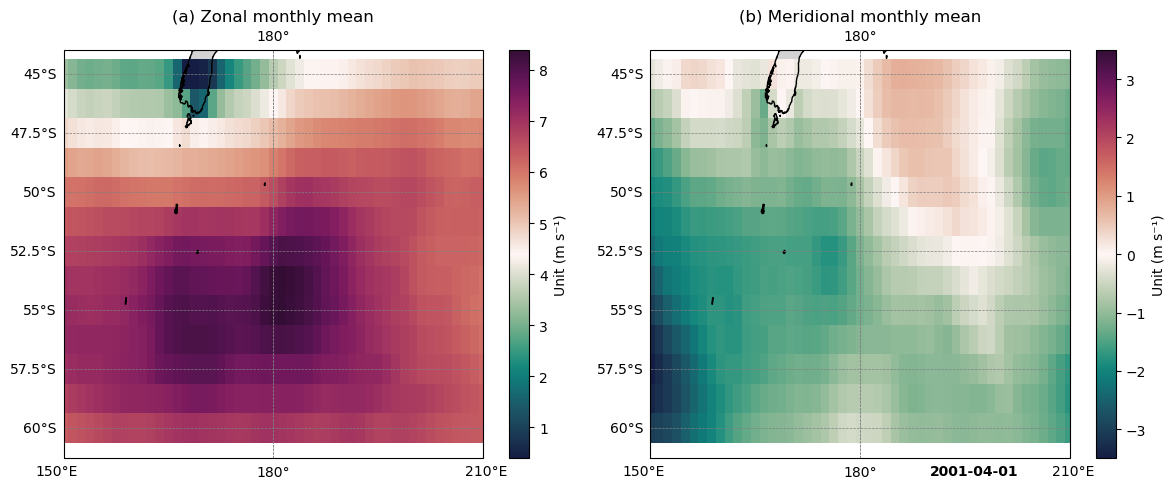

In [29]:
# Plot the monthly mean zonal and meridional wind speed fields
u_component_mon_mean_1993_2020 = jra_ugrd_wind_mon_mean_1993_2020.isel(initial_time1_months=100)
v_component_mon_mean_1993_2020 = jra_vgrd_wind_mon_mean_1993_2020.isel(initial_time1_months=100)

fig = plt.figure(figsize=(12, 5))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax1.pcolor(jra_ugrd_lon, jra_ugrd_lat, jra_ugrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

u_component_mon_mean_1993_2020.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.curl', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹)'})
ax1.set_title('(a) Zonal monthly mean')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Meridional component of the wind velocities
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
#ax2.pcolor(jra_vgrd_lon, jra_vgrd_lat, jra_vgrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

v_component_mon_mean_1993_2020.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.curl', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹)'})
ax2.set_title('(b) Meridional monthly mean')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Adjust the layout
plt.tight_layout()

# Show the time of the wind field
date_str_mon_mean = str(jra_ugrd_wind_mon_mean_1993_2020.initial_time1_months.values[100].astype('datetime64[D]'))
ax2.text(lon_CP_east-20, -61.5, date_str_mon_mean, transform=ccrs.PlateCarree(), ha='left', va='top', color='black', fontweight='bold')

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_{date_str_mon_mean}_monthly_mean_zonal_meridional_wind_speeds.png', dpi=600)

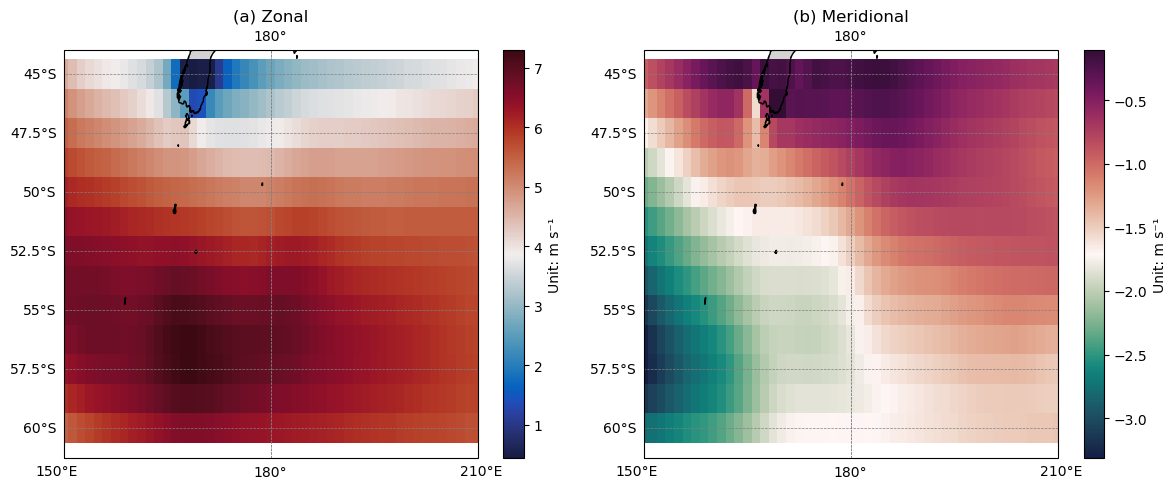

In [30]:
# Plot the 1958-2021 mean zonal and meridional wind speed fields

fig = plt.figure(figsize=(12, 5))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax1.pcolor(jra_ugrd_lon, jra_ugrd_lat, jra_ugrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_ugrd_wind.mean(dim=['initial_time0_hours']).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Unit: m s⁻¹'})
ax1.set_title('(a) Zonal')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Meridional component of the wind velocities
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
#ax2.pcolor(jra_vgrd_lon, jra_vgrd_lat, jra_vgrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_south + 12, lat_CP_north - 14])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -61.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -61.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_vgrd_wind.mean(dim=['initial_time0_hours']).plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.curl', add_colorbar=True, cbar_kwargs={'label': 'Unit: m s⁻¹'})
ax2.set_title('(b) Meridional')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Adjust the layout
plt.tight_layout()

# Show the time of the wind field
#date_str_yr = str(tim_tran_yr[0])
#ax2.text(lon_CP_east-20, -61.5, date_str_yr, transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_1993_2021_mean_zonal_meridional_wind_speeds.png', dpi=600)

In [31]:
# Derive the 1993-2020 daily mean zonal and meridional wind speeds (set the tiem range limit)
jra_ugrd_wind_1993_2020 = jra_ugrd_wind.where(
    np.logical_and(
        (jra_ugrd_wind.initial_time0_hours >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_ugrd_wind.initial_time0_hours < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

jra_vgrd_wind_1993_2020 = jra_vgrd_wind.where(
    np.logical_and(
        (jra_vgrd_wind.initial_time0_hours >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_vgrd_wind.initial_time0_hours < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

In [32]:
jra_ugrd_wind_1993_2020

<xarray.DataArray 'UGRD_GDS0_HTGL' (initial_time0_hours: 10012, g0_lat_1: 13, g0_lon_2: 49)>
array([[[ 3.13751221e-01, -5.72967529e-01, -1.47140503e+00, ...,
         -8.66671753e+00, -8.66671753e+00, -9.55343628e+00],
        [-2.94406128e+00, -2.73312378e+00, -2.55343628e+00, ...,
         -9.64328003e+00, -9.78781128e+00, -1.06862488e+01],
        [ 7.27813721e-01,  6.84844971e-01,  5.09063721e-01, ...,
         -9.28781128e+00, -9.45187378e+00, -1.00417175e+01],
        ...,
        [ 7.31765747e+00,  9.20828247e+00,  1.10168762e+01, ...,
          3.60281372e+00,  3.86062622e+00,  3.80593872e+00],
        [ 9.43093872e+00,  1.07981262e+01,  1.15989075e+01, ...,
          5.74734497e+00,  6.10281372e+00,  6.41921997e+00],
        [ 8.38015747e+00,  8.22781372e+00,  7.97000122e+00, ...,
          7.47781372e+00,  7.85281372e+00,  8.12625122e+00]],

       [[-4.08650589e+00, -4.53181839e+00, -4.57478714e+00, ...,
          3.62833786e+00,  2.06974411e+00, -6.33380890e-01],
        [-4.80916214e+00, -4.82478714e+00, -4.59431839e+00, ...,
          2.25994110e-01, -3.65681839e+00, -6.37166214e+00],
        [-4.38728714e+00, -4.05134964e+00, -3.71541214e+00, ...,
         -5.89119339e+00, -9.08259964e+00, -1.08482246e+01],
...
          8.35962677e+00,  8.42603302e+00,  8.41431427e+00],
        [ 7.74243927e+00,  7.28150177e+00,  7.81275177e+00, ...,
          8.11743927e+00,  7.93775177e+00,  7.52368927e+00],
        [ 7.04322052e+00,  5.36353302e+00,  5.11743927e+00, ...,
          7.74243927e+00,  7.39087677e+00,  6.88306427e+00]],

       [[ 2.28887177e+00,  2.46074677e+00,  2.64043427e+00, ...,
          5.26152802e+00,  5.36309052e+00,  5.45293427e+00],
        [ 2.86699677e+00,  2.46855927e+00,  2.27715302e+00, ...,
          6.63652802e+00,  6.66387177e+00,  6.61699677e+00],
        [ 3.38262177e+00,  3.15215302e+00,  2.92949677e+00, ...,
          7.59355927e+00,  7.69121552e+00,  7.83184052e+00],
        ...,
        [ 2.02934265e-01,  1.70684052e+00,  3.33965302e+00, ...,
          1.25857468e+01,  1.24959030e+01,  1.25193405e+01],
        [-6.17378235e-01,  6.24809265e-01,  1.78496552e+00, ...,
          1.18357468e+01,  1.11638718e+01,  1.03982468e+01],
        [ 2.58574677e+00,  3.60527802e+00,  4.74590302e+00, ...,
          8.70293427e+00,  7.51543427e+00,  7.00371552e+00]]],
      dtype=float32)
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 1993-01-01T09:0...
  * g0_lon_2             (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0
  * g0_lat_1             (g0_lat_1) float32 -45.0 -46.25 -47.5 ... -58.75 -60.0
Attributes:
    long_name:                u-component of wind
    units:                    m/s
    forecast_time_units:      hours
    forecast_time:            0
    level:                    10
    parameter_number:         33
    parameter_table_version:  200
    gds_grid_type:            0
    level_indicator:          105
    center:                   Japanese Meteorological Agency - Tokyo (RSMC)
    sub_center:               241

In [33]:
# Set the time range between 1993 and 2020 for the time variable
jra_ugrd_time_hr_1993_2020 = jra_ugrd_time_hr.where(
    np.logical_and(
        (jra_ugrd_time_hr >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_ugrd_time_hr < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

jra_vgrd_time_hr_1993_2020 = jra_vgrd_time_hr.where(
    np.logical_and(
        (jra_vgrd_time_hr >= np.datetime64('1993-01-01T09:00:00.000000000')),
        (jra_vgrd_time_hr < np.datetime64('2020-05-31T09:00:00.000000000'))
    ),
    drop=True
)

In [34]:
# Limit the 1993-2020 daily zonal and meridional wind speeds to the study Campbell Plateua region

jra_ugrd_wind_1993_2020_CP_region = jra_ugrd_wind_1993_2020.where((jra_ugrd_wind_1993_2020.g0_lat_1 >= -57.0) & (jra_ugrd_wind_1993_2020.g0_lat_1 <= -46.0), drop=True)
jra_vgrd_wind_1993_2020_CP_region = jra_vgrd_wind_1993_2020.where((jra_vgrd_wind_1993_2020.g0_lat_1 >= -57.0) & (jra_vgrd_wind_1993_2020.g0_lat_1 <= -46.0), drop=True)

jra_ugrd_tre_wind_CP_region = jra_ugrd_tre_wind.where((jra_ugrd_tre_wind.g0_lat_1 >= -57.0) & (jra_ugrd_tre_wind.g0_lat_1 <= -46.0), drop=True)
jra_vgrd_tre_wind_CP_region = jra_vgrd_tre_wind.where((jra_vgrd_tre_wind.g0_lat_1 >= -57.0) & (jra_vgrd_tre_wind.g0_lat_1 <= -46.0), drop=True)

In [35]:
jra_ugrd_wind_1993_2020_CP_region

<xarray.DataArray 'UGRD_GDS0_HTGL' (initial_time0_hours: 10012, g0_lat_1: 9, g0_lon_2: 49)>
array([[[-2.94406128e+00, -2.73312378e+00, -2.55343628e+00, ...,
         -9.64328003e+00, -9.78781128e+00, -1.06862488e+01],
        [ 7.27813721e-01,  6.84844971e-01,  5.09063721e-01, ...,
         -9.28781128e+00, -9.45187378e+00, -1.00417175e+01],
        [ 4.02078247e+00,  4.00515747e+00,  3.93484497e+00, ...,
         -8.54562378e+00, -8.76828003e+00, -9.19015503e+00],
        ...,
        [ 8.85671997e+00,  9.57546997e+00,  1.03723450e+01, ...,
         -4.99874878e+00, -4.98312378e+00, -4.76437378e+00],
        [ 8.84890747e+00,  9.81765747e+00,  1.09426575e+01, ...,
         -2.45968628e+00, -2.52218628e+00, -2.28390503e+00],
        [ 5.61062622e+00,  7.02078247e+00,  8.44265747e+00, ...,
          6.57501221e-01,  7.00469971e-01,  6.14532471e-01]],

       [[-4.80916214e+00, -4.82478714e+00, -4.59431839e+00, ...,
          2.25994110e-01, -3.65681839e+00, -6.37166214e+00],
        [-4.38728714e+00, -4.05134964e+00, -3.71541214e+00, ...,
         -5.89119339e+00, -9.08259964e+00, -1.08482246e+01],
        [-2.98103714e+00, -2.40681839e+00, -1.81306839e+00, ...,
         -1.01099434e+01, -1.14654121e+01, -1.18247871e+01],
...
          8.09400177e+00,  8.82056427e+00,  9.63697052e+00],
        [ 8.31275177e+00,  7.18384552e+00,  7.26978302e+00, ...,
          8.30493927e+00,  8.88306427e+00,  9.56275177e+00],
        [ 7.15259552e+00,  6.76587677e+00,  7.51978302e+00, ...,
          8.47681427e+00,  8.83228302e+00,  9.19556427e+00]],

       [[ 2.86699677e+00,  2.46855927e+00,  2.27715302e+00, ...,
          6.63652802e+00,  6.66387177e+00,  6.61699677e+00],
        [ 3.38262177e+00,  3.15215302e+00,  2.92949677e+00, ...,
          7.59355927e+00,  7.69121552e+00,  7.83184052e+00],
        [ 1.91387177e+00,  2.19512177e+00,  2.58574677e+00, ...,
          8.53887177e+00,  8.81230927e+00,  9.13262177e+00],
        ...,
        [-1.36347198e+00, -3.75190735e-01,  8.35746765e-01, ...,
          1.21130905e+01,  1.23201218e+01,  1.24177780e+01],
        [ 7.62176514e-03,  5.58403015e-01,  1.06621552e+00, ...,
          1.26443405e+01,  1.27576218e+01,  1.28357468e+01],
        [-2.21894073e+00, -1.09003448e+00,  4.88090515e-01, ...,
          1.27498093e+01,  1.28396530e+01,  1.27888718e+01]]],
      dtype=float32)
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 1993-01-01T09:0...
  * g0_lon_2             (g0_lon_2) float32 150.0 151.2 152.5 ... 208.8 210.0
  * g0_lat_1             (g0_lat_1) float32 -46.25 -47.5 -48.75 ... -55.0 -56.25
Attributes:
    long_name:                u-component of wind
    units:                    m/s
    forecast_time_units:      hours
    forecast_time:            0
    level:                    10
    parameter_number:         33
    parameter_table_version:  200
    gds_grid_type:            0
    level_indicator:          105
    center:                   Japanese Meteorological Agency - Tokyo (RSMC)
    sub_center:               241

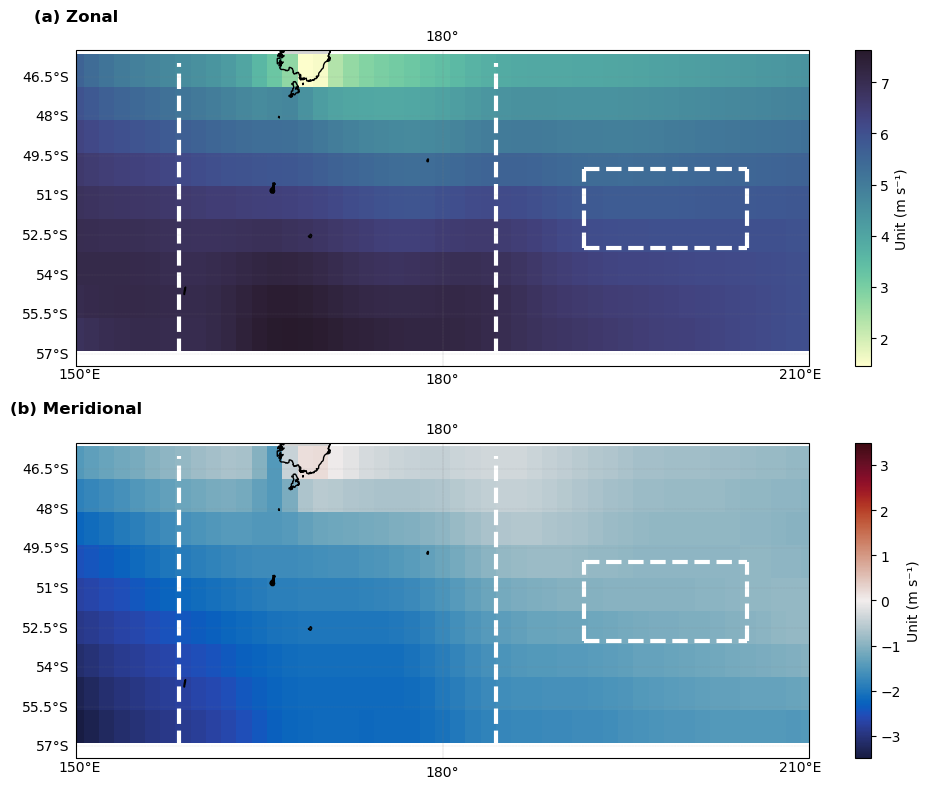

In [36]:
# Plot the spatial distribution of the 1993-2020 mean zonal and meridional wind speeds
fig = plt.figure(figsize=(10, 8))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax1.pcolor(jra_ugrd_lon, jra_ugrd_lat, jra_ugrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3, lat_CP_region_north+0.5])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.1, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_ugrd_wind_1993_2020_CP_region.mean(dim=['initial_time0_hours']).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.deep', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹)'})
ax1.set_title('(a) Zonal', fontweight='bold')
ax1.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax1.plot([158.4, 158.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([184.4, 184.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax1.plot([191.6, 191.6], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([204.9, 204.9], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax1.plot([191.6, 204.9], [-50, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([191.6, 204.9], [-53, -53], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream


# Meridional component of the wind velocities
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
#ax2.pcolor(jra_vgrd_lon, jra_vgrd_lat, jra_vgrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3, lat_CP_region_north+0.5])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.1, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_vgrd_wind_1993_2020_CP_region.mean(dim=['initial_time0_hours']).plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Unit (m s⁻¹)'})
ax2.set_title('(b) Meridional', fontweight='bold')
ax2.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax2.plot([158.4, 158.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([184.4, 184.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax2.plot([191.6, 191.6], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([204.9, 204.9], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax2.plot([191.6, 204.9], [-50, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([191.6, 204.9], [-53, -53], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Adjust the layout
plt.tight_layout()

# Show the time of the wind field
#date_str_yr = str(tim_tran_yr[0])
#ax2.text(lon_CP_east-20, -61.5, date_str_yr, transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_region_1993_2020_mean_zonal_meridional_wind_speeds.png', dpi=600)

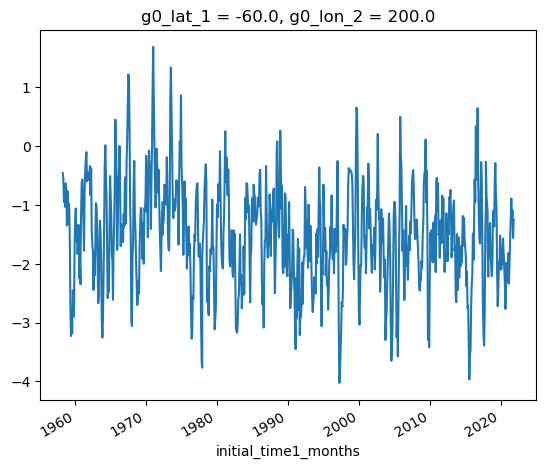

In [37]:
jra_vgrd_wind_mon_mean.isel(g0_lat_1=12, g0_lon_2=40).plot.line(x='initial_time1_months')

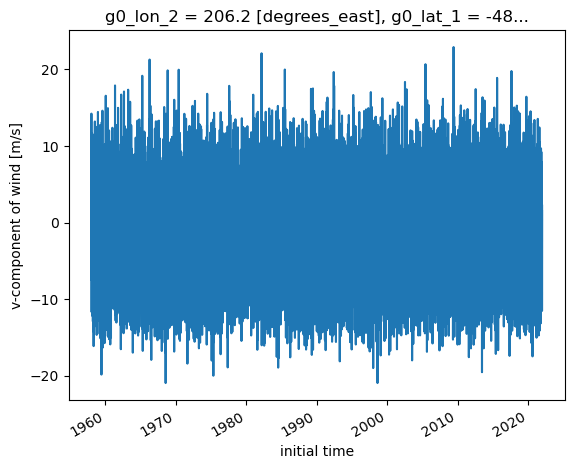

In [38]:
jra_vgrd_wind.isel(g0_lat_1=3, g0_lon_2=45).plot.line(x='initial_time0_hours')

In [39]:
# Average the wind speed over the whole region, four different sections of the Campbell Plateau region

# Set the longitude ranges of different sections of the Campbell Plateau region
lon_up = [150, 158.4]
lon_pl = [158.4, 184.4]
lon_dw = [184.4, 210]
lon_fl = [191.6, 204.9]
lon_wh = [150, 210]

In [40]:
# Select the specific longitude ranges for the wind speed in different sections of the Campbell Plateau region
# Zonal component:
jra_ugrd_wind_1993_2020_CP_region_up = jra_ugrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(150, 158.4))
jra_ugrd_wind_1993_2020_CP_region_pl = jra_ugrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(158.4, 184.4))
jra_ugrd_wind_1993_2020_CP_region_dw = jra_ugrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(184.4, 210))
jra_ugrd_wind_1993_2020_CP_region_fl = jra_ugrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(191.6, 204.9))
jra_ugrd_wind_1993_2020_CP_region_wh = jra_ugrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(150, 210))

# Meridional component:
jra_vgrd_wind_1993_2020_CP_region_up = jra_vgrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(150, 158.4))
jra_vgrd_wind_1993_2020_CP_region_pl = jra_vgrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(158.4, 184.4))
jra_vgrd_wind_1993_2020_CP_region_dw = jra_vgrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(184.4, 210))
jra_vgrd_wind_1993_2020_CP_region_fl = jra_vgrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(191.6, 204.9))
jra_vgrd_wind_1993_2020_CP_region_wh = jra_vgrd_wind_1993_2020_CP_region.sel(g0_lon_2=slice(150, 210))


# Average the values over the whole g0_lat_1 and g0_lon_2 dimensions
jra_ugrd_wind_1993_2020_CP_region_up_mean = jra_ugrd_wind_1993_2020_CP_region_up.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_1993_2020_CP_region_pl_mean = jra_ugrd_wind_1993_2020_CP_region_pl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_1993_2020_CP_region_dw_mean = jra_ugrd_wind_1993_2020_CP_region_dw.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_1993_2020_CP_region_fl_mean = jra_ugrd_wind_1993_2020_CP_region_fl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_1993_2020_CP_region_wh_mean = jra_ugrd_wind_1993_2020_CP_region_wh.mean(dim=['g0_lat_1', 'g0_lon_2'])

jra_vgrd_wind_1993_2020_CP_region_up_mean = jra_vgrd_wind_1993_2020_CP_region_up.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_1993_2020_CP_region_pl_mean = jra_vgrd_wind_1993_2020_CP_region_pl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_1993_2020_CP_region_dw_mean = jra_vgrd_wind_1993_2020_CP_region_dw.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_1993_2020_CP_region_fl_mean = jra_vgrd_wind_1993_2020_CP_region_fl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_1993_2020_CP_region_wh_mean = jra_vgrd_wind_1993_2020_CP_region_wh.mean(dim=['g0_lat_1', 'g0_lon_2'])

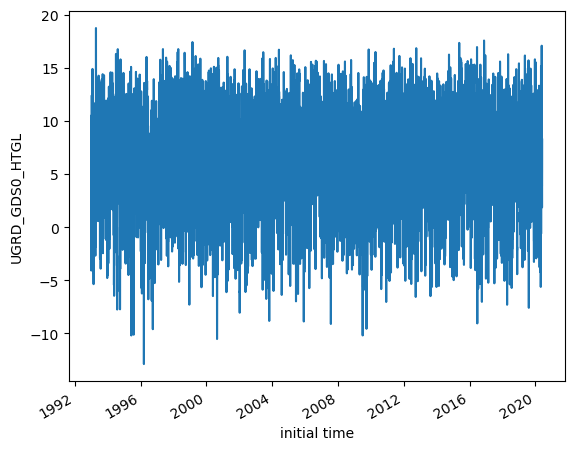

In [41]:
# Plot an example of the time series of these different wind speed field
jra_ugrd_wind_1993_2020_CP_region_up_mean.plot.line(x='initial_time0_hours')

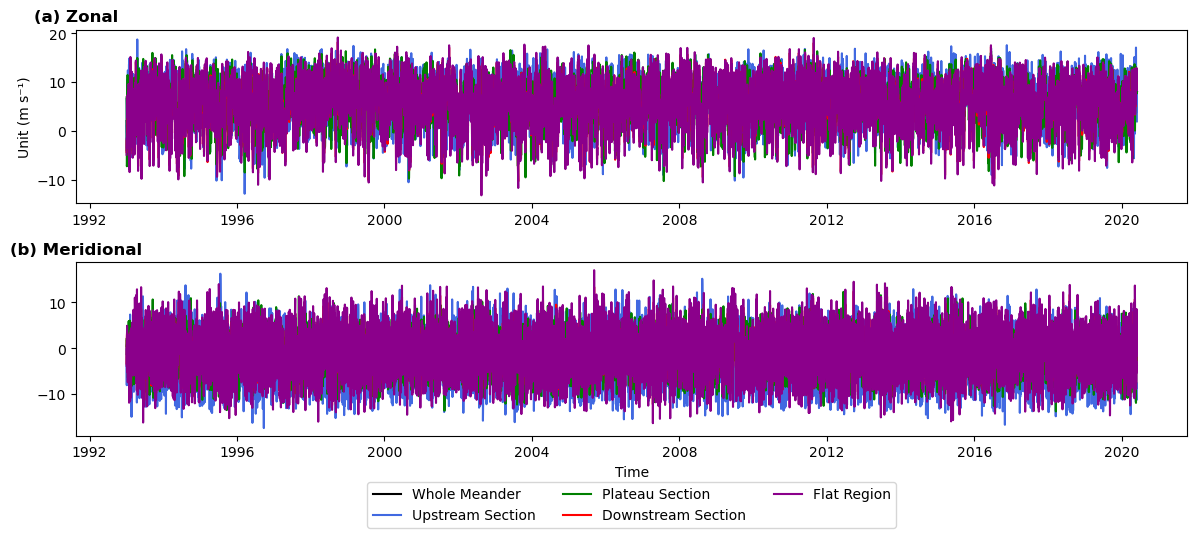

In [42]:
# Plot the time series of the partial zonal and meridional monthly mean wind speed field in different sections of the Campbell Plateau region
# Based on the daily data
fig = plt.figure(figsize=(12, 5))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(jra_ugrd_time_hr_1993_2020, jra_ugrd_wind_1993_2020_CP_region_wh_mean, c='black', label='Whole Meander')
ax1.plot(jra_ugrd_time_hr_1993_2020, jra_ugrd_wind_1993_2020_CP_region_up_mean, c='royalblue', label='Upstream Section')
ax1.plot(jra_ugrd_time_hr_1993_2020, jra_ugrd_wind_1993_2020_CP_region_pl_mean, c='green', label='Plateau Section')
ax1.plot(jra_ugrd_time_hr_1993_2020, jra_ugrd_wind_1993_2020_CP_region_dw_mean, c='red', label='Downstream Section')
ax1.plot(jra_ugrd_time_hr_1993_2020, jra_ugrd_wind_1993_2020_CP_region_fl_mean, c='darkmagenta', label='Flat Region')

# Linear regressions of all the zonal wind fields in different sections
#coef_ugrd_wh = np.polyfit(jra_ugrd_time_day_num, jra_ugrd_wind_wh, 1)
#reg_ugrd_wh = np.polyval(coef_ugrd_wh, jra_ugrd_time_day_num)
#ax1.plot(jra_ugrd_time_hr, reg_ugrd_wh, c='black', linestyle='--')

#coef_ugrd_up = np.polyfit(jra_ugrd_time_day_num, jra_ugrd_wind_up, 1)
#reg_ugrd_up = np.polyval(coef_ugrd_up, jra_ugrd_time_day_num)
#ax1.plot(jra_ugrd_time_hr, reg_ugrd_up, c='royalblue', linestyle='--')

#coef_ugrd_pl = np.polyfit(jra_ugrd_time_day_num, jra_ugrd_wind_pl, 1)
#reg_ugrd_pl = np.polyval(coef_ugrd_pl, jra_ugrd_time_day_num)
#ax1.plot(jra_ugrd_time_hr, reg_ugrd_pl, c='green', linestyle='--')

#coef_ugrd_dw = np.polyfit(jra_ugrd_time_day_num, jra_ugrd_wind_dw, 1)
#reg_ugrd_dw = np.polyval(coef_ugrd_dw, jra_ugrd_time_day_num)
#ax1.plot(jra_ugrd_time_hr, reg_ugrd_dw, c='red', linestyle='--')

#coef_ugrd_fl = np.polyfit(jra_ugrd_time_day_num, jra_ugrd_wind_fl, 1)
#reg_ugrd_fl = np.polyval(coef_ugrd_fl, jra_ugrd_time_day_num)
#ax1.plot(jra_ugrd_time_hr, reg_ugrd_fl, c='darkmagenta', linestyle='--')

ax1.set_title('(a) Zonal', fontweight='bold')
ax1.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax1.set_ylabel('Unit (m s⁻¹)')

# Meridional component of the wind velocities
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(jra_vgrd_time_hr_1993_2020, jra_vgrd_wind_1993_2020_CP_region_wh_mean, c='black', label='Whole Meander')
ax2.plot(jra_vgrd_time_hr_1993_2020, jra_vgrd_wind_1993_2020_CP_region_up_mean, c='royalblue', label='Upstream Section')
ax2.plot(jra_vgrd_time_hr_1993_2020, jra_vgrd_wind_1993_2020_CP_region_pl_mean, c='green', label='Plateau Section')
ax2.plot(jra_vgrd_time_hr_1993_2020, jra_vgrd_wind_1993_2020_CP_region_dw_mean, c='red', label='Downstream Section')
ax2.plot(jra_vgrd_time_hr_1993_2020, jra_vgrd_wind_1993_2020_CP_region_fl_mean, c='darkmagenta', label='Flat Region')

# Linear regressions of all the meridional wind fields in different sections
#coef_vgrd_wh = np.polyfit(jra_ugrd_time_day_num, jra_vgrd_wind_wh, 1)
#reg_vgrd_wh = np.polyval(coef_vgrd_wh, jra_ugrd_time_day_num)
#ax2.plot(jra_ugrd_time_hr, reg_vgrd_wh, c='black', linestyle='--')

#coef_vgrd_up = np.polyfit(jra_ugrd_time_day_num, jra_vgrd_wind_up, 1)
#reg_vgrd_up = np.polyval(coef_vgrd_up, jra_ugrd_time_day_num)
#ax2.plot(jra_ugrd_time_hr, reg_vgrd_up, c='royalblue', linestyle='--')

#coef_vgrd_pl = np.polyfit(jra_ugrd_time_day_num, jra_vgrd_wind_pl, 1)
#reg_vgrd_pl = np.polyval(coef_vgrd_pl, jra_ugrd_time_day_num)
#ax2.plot(jra_ugrd_time_hr, reg_vgrd_pl, c='green', linestyle='--')

#coef_vgrd_dw = np.polyfit(jra_ugrd_time_day_num, jra_vgrd_wind_dw, 1)
#reg_vgrd_dw = np.polyval(coef_vgrd_dw, jra_ugrd_time_day_num)
#ax2.plot(jra_ugrd_time_hr, reg_vgrd_dw, c='red', linestyle='--')

#coef_vgrd_fl = np.polyfit(jra_ugrd_time_day_num, jra_vgrd_wind_fl, 1)
#reg_vgrd_fl = np.polyval(coef_vgrd_fl, jra_ugrd_time_day_num)
#ax2.plot(jra_ugrd_time_hr, reg_vgrd_fl, c='darkmagenta', linestyle='--')

ax2.set_title('(b) Meridional', fontweight='bold')
ax2.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax2.set_xlabel('Time')
#ax2.set_ylabel('Unit (m s⁻¹)')

# Adjust the layout
plt.tight_layout()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.57), ncol=3)

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_region_1993_2020_zonal_meridional_daily_wind_speeds_time_series.png', dpi=600, bbox_inches='tight')

In [43]:
# Now we specify the monthly mean zonal and meridional wind speeds into the smaller domain
jra_ugrd_wind_mon_mean_1993_2020_CP_region = jra_ugrd_wind_mon_mean_1993_2020.where((jra_ugrd_wind_mon_mean_1993_2020.g0_lat_1 > -57.0) & (jra_ugrd_wind_mon_mean_1993_2020.g0_lat_1 < -46.0), drop=True)
jra_vgrd_wind_mon_mean_1993_2020_CP_region = jra_vgrd_wind_mon_mean_1993_2020.where((jra_vgrd_wind_mon_mean_1993_2020.g0_lat_1 > -57.0) & (jra_vgrd_wind_mon_mean_1993_2020.g0_lat_1 < -46.0), drop=True)

jra_ugrd_wind_mon_mean_1993_2020_CP_region_up = jra_ugrd_wind_mon_mean_1993_2020_CP_region.where((jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 150) & (jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 158.4), drop=True)
jra_ugrd_wind_mon_mean_1993_2020_CP_region_pl = jra_ugrd_wind_mon_mean_1993_2020_CP_region.where((jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 158.4) & (jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 184.4), drop=True)
jra_ugrd_wind_mon_mean_1993_2020_CP_region_dw = jra_ugrd_wind_mon_mean_1993_2020_CP_region.where((jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 184.4) & (jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 210), drop=True)
jra_ugrd_wind_mon_mean_1993_2020_CP_region_fl = jra_ugrd_wind_mon_mean_1993_2020_CP_region.where((jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 191.6) & (jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 204.9), drop=True)
jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh = jra_ugrd_wind_mon_mean_1993_2020_CP_region.where((jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 150) & (jra_ugrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 210), drop=True)

jra_vgrd_wind_mon_mean_1993_2020_CP_region_up = jra_vgrd_wind_mon_mean_1993_2020_CP_region.where((jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 150) & (jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 158.4), drop=True)
jra_vgrd_wind_mon_mean_1993_2020_CP_region_pl = jra_vgrd_wind_mon_mean_1993_2020_CP_region.where((jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 158.4) & (jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 184.4), drop=True)
jra_vgrd_wind_mon_mean_1993_2020_CP_region_dw = jra_vgrd_wind_mon_mean_1993_2020_CP_region.where((jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 184.4) & (jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 210), drop=True)
jra_vgrd_wind_mon_mean_1993_2020_CP_region_fl = jra_vgrd_wind_mon_mean_1993_2020_CP_region.where((jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 191.6) & (jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 204.9), drop=True)
jra_vgrd_wind_mon_mean_1993_2020_CP_region_wh = jra_vgrd_wind_mon_mean_1993_2020_CP_region.where((jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 > 150) & (jra_vgrd_wind_mon_mean_1993_2020_CP_region.g0_lon_2 < 210), drop=True)

In [44]:
# Average the values over the whole g0_lat_1 and g0_lon_2 dimensions
jra_ugrd_wind_mon_mean_1993_2020_CP_region_up_avg = jra_ugrd_wind_mon_mean_1993_2020_CP_region_up.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_mon_mean_1993_2020_CP_region_pl_avg = jra_ugrd_wind_mon_mean_1993_2020_CP_region_pl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_mon_mean_1993_2020_CP_region_dw_avg = jra_ugrd_wind_mon_mean_1993_2020_CP_region_dw.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_mon_mean_1993_2020_CP_region_fl_avg = jra_ugrd_wind_mon_mean_1993_2020_CP_region_fl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh_avg = jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh.mean(dim=['g0_lat_1', 'g0_lon_2'])

jra_vgrd_wind_mon_mean_1993_2020_CP_region_up_avg = jra_vgrd_wind_mon_mean_1993_2020_CP_region_up.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_mon_mean_1993_2020_CP_region_pl_avg = jra_vgrd_wind_mon_mean_1993_2020_CP_region_pl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_mon_mean_1993_2020_CP_region_dw_avg = jra_vgrd_wind_mon_mean_1993_2020_CP_region_dw.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_mon_mean_1993_2020_CP_region_fl_avg = jra_vgrd_wind_mon_mean_1993_2020_CP_region_fl.mean(dim=['g0_lat_1', 'g0_lon_2'])
jra_vgrd_wind_mon_mean_1993_2020_CP_region_wh_avg = jra_vgrd_wind_mon_mean_1993_2020_CP_region_wh.mean(dim=['g0_lat_1', 'g0_lon_2'])

In [45]:
jra_ugrd_wind_mon_mean_1993_2020_CP_region_time = jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months
jra_vgrd_wind_mon_mean_1993_2020_CP_region_time = jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months

In [46]:
jra_ugrd_wind_mon_mean_1993_2020_CP_region_time = jra_ugrd_wind_mon_mean_1993_2020_CP_region_time.dt.strftime('%Y-%m')
jra_vgrd_wind_mon_mean_1993_2020_CP_region_time = jra_vgrd_wind_mon_mean_1993_2020_CP_region_time.dt.strftime('%Y-%m')

In [47]:
jra_ugrd_wind_mon_mean_1993_2020_CP_region_time

<xarray.DataArray 'strftime' (initial_time1_months: 333)>
array(['1993-02', '1993-03', '1993-04', '1993-05', '1993-06', '1993-07',
       '1993-08', '1993-09', '1993-10', '1993-11', '1993-12', '1994-01',
       '1994-02', '1994-03', '1994-04', '1994-05', '1994-06', '1994-07',
       '1994-08', '1994-09', '1994-10', '1994-11', '1994-12', '1995-01',
       '1995-01', '1995-03', '1995-04', '1995-05', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12',
       '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06',
       '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12',
       '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06',
       '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12',
       '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06',
       '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12',
       '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-10', '2000-11',
       '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05',
       '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11',
       '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05',
       '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11',
...
       '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04',
       '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
       '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04',
       '2012-05', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2017-12', '2018-01', '2018-03',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05'], dtype=object)
Coordinates:
  * initial_time1_months  (initial_time1_months) datetime64[ns] 1993-02-01 .....

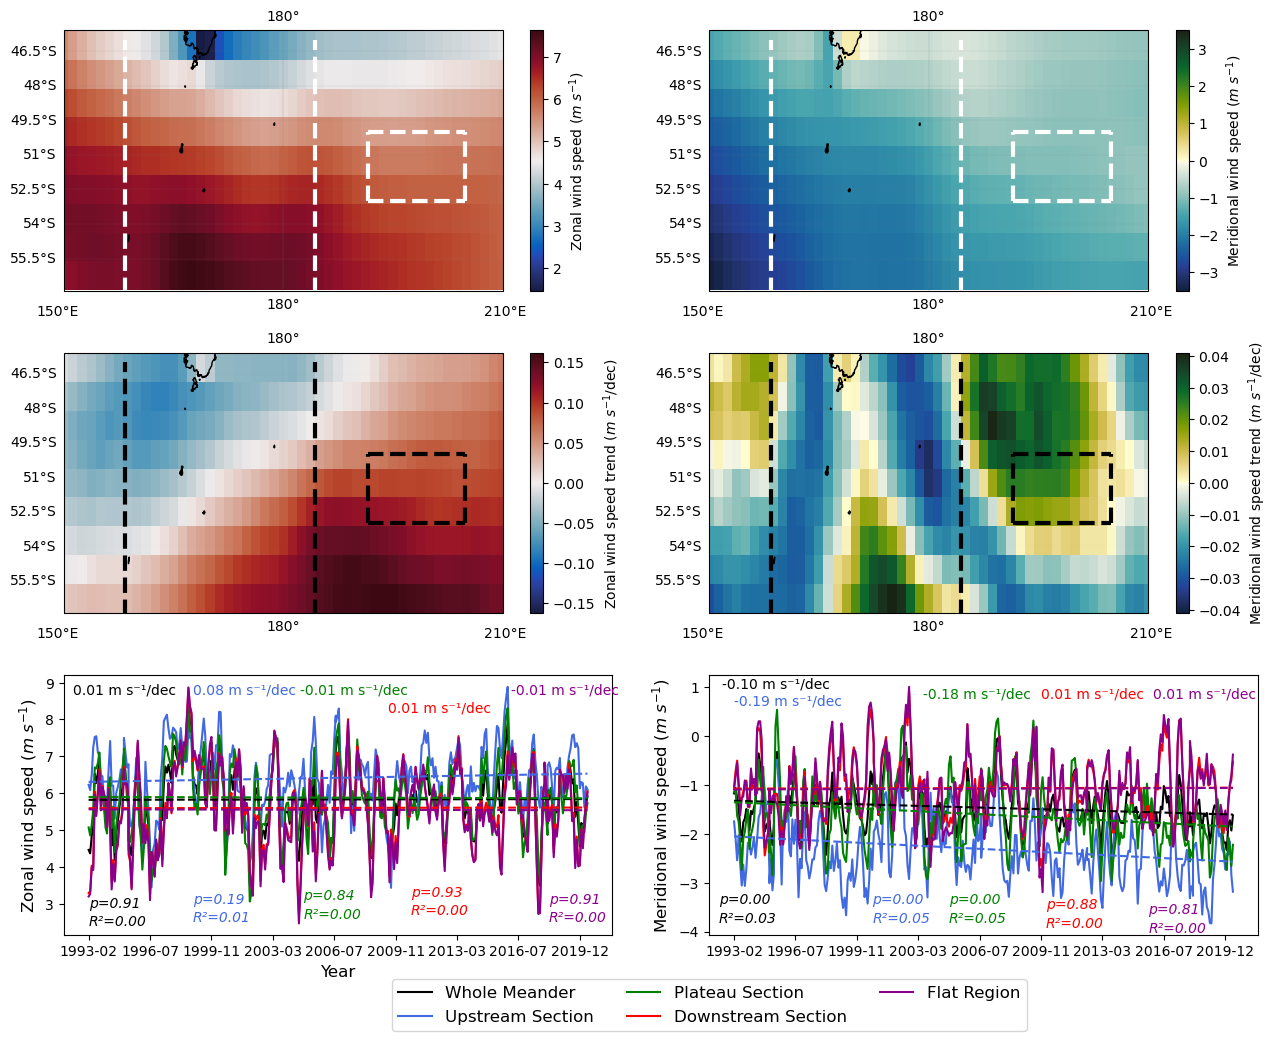

In [88]:
# Plot a comprehensive figure of the zonal and meridional wind speed fields

fig = plt.figure(figsize=(13, 10))  # Increased the figure size


# First subplots: spatial distribution of the 1993-2020 mean zonal and meridional wind speeds

# Zonal component
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax1.pcolor(jra_ugrd_lon, jra_ugrd_lat, jra_ugrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax1.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3.57, lat_CP_region_north+0.4])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.1, linestyle='--', color='gray')
ax1.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_ugrd_wind_1993_2020_CP_region.mean(dim=['initial_time0_hours']).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': 'Zonal wind speed ($m$ $s^{-1}$)'})
ax1.set_title('')
#ax1.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax1.plot([158.4, 158.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([184.4, 184.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax1.plot([191.6, 191.6], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([204.9, 204.9], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax1.plot([191.6, 204.9], [-50, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([191.6, 204.9], [-53, -53], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream


# Meridional component
ax2 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
#ax2.pcolor(jra_vgrd_lon, jra_vgrd_lat, jra_vgrd_wind_mon_mean.isel(initial_time1_months=3), cmap='cmo.curl')
ax2.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3.57, lat_CP_region_north+0.4])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.1, linestyle='--', color='gray')
ax2.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_vgrd_wind_1993_2020_CP_region.mean(dim=['initial_time0_hours']).plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.delta', add_colorbar=True, cbar_kwargs={'label': 'Meridional wind speed ($m$ $s^{-1}$)'})
ax2.set_title('')
#ax2.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax2.plot([158.4, 158.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([184.4, 184.4], [-57, -46], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax2.plot([191.6, 191.6], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([204.9, 204.9], [-53, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax2.plot([191.6, 204.9], [-50, -50], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([191.6, 204.9], [-53, -53], color='white', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream



# Then, we plot the spatial distribution of the temporal trend for each spatial point in the CP region

# Zonal component of the wind velocities
ax3 = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3.57, lat_CP_region_north+0.4])
ax3.coastlines(resolution='10m')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.gridlines(draw_labels=True, linewidth=0.01, linestyle='--', color='gray')
ax3.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax3.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_ugrd_tre_wind_CP_region_dec = jra_ugrd_tre_wind_CP_region*10
jra_ugrd_tre_wind_CP_region_dec.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs = {'label': 'Zonal wind speed trend ($m$ $s^{-1}$/dec)'})
ax3.set_title('')
ax3.set_ylabel('Latitude', fontsize=14)
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax3.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax3.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax3.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax3.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax3.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax3.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream


# Meridional component of the wind velocities: spatial distribution
ax4 = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_extent([lon_CP_west, lon_CP_east, lat_CP_region_south+3.57, lat_CP_region_north+0.4])
ax4.coastlines(resolution='10m')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.gridlines(draw_labels=True, linewidth=0.01, linestyle='--', color='gray')
ax4.text(lon_CP_west + 2, -57.5, f'{lon_CP_west}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax4.text(lon_CP_east - 2.5, -57.5, f'{lon_CP_east}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

jra_vgrd_tre_wind_CP_region_dec = jra_vgrd_tre_wind_CP_region*10
jra_vgrd_tre_wind_CP_region_dec.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap='cmo.delta', add_colorbar=True, cbar_kwargs = {'label': 'Meridional wind speed trend ($m$ $s^{-1}$/dec)'})
ax4.set_title('')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax4.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax4.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax4.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax4.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax4.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax4.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

ax4.set_xlabel('Longitude', fontsize=14)



# Finally, we plot the time series of the zonal and meridional wind speeds over the 1993-2020 period

# Zonal component of the wind velocities
ax5 = fig.add_subplot(3, 2, 5)
ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh_avg, c='black', label='Whole Meander')
ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_up_avg, c='royalblue', label='Upstream Section')
ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_pl_avg, c='green', label='Plateau Section')
ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_dw_avg, c='red', label='Downstream Section')
ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_fl_avg, c='darkmagenta', label='Flat Region')

# Linear regressions of all the zonal wind fields in different sections

# Whole Meander: 
# Perform linear regression
slope_ugrd_wh, intercept_ugrd_wh, r_ugrd_wh, p_ugrd_wh, std_err_ugrd_wh = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh_avg)

# Calculate regression line
reg_ugrd_wh = slope_ugrd_wh * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_wh

# Calculate R-squared value
r_squ_ugrd_wh = r_ugrd_wh ** 2

ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_ugrd_wh_str = '{:.2f} m s⁻¹/dec'.format(slope_ugrd_wh*3.1536e+16*10)
p_ugrd_wh_str = 'p={:.2f}'.format(p_ugrd_wh)
r_squ_ugrd_wh_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_wh)

ax5.text(-10, 9, slope_ugrd_wh_str, ha='left', va='top', color='black', fontsize=10)
ax5.text(0, 3.2, p_ugrd_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)
ax5.text(0, 2.7, r_squ_ugrd_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)


# Upstream Section: 
# Perform linear regression
slope_ugrd_up, intercept_ugrd_up, r_ugrd_up, p_ugrd_up, std_err_ugrd_up = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_up_avg)

# Calculate regression line
reg_ugrd_up = slope_ugrd_up * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_up

# Calculate R-squared value
r_squ_ugrd_up = r_ugrd_up ** 2

ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_up, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_ugrd_up_str = '{:.2f} m s⁻¹/dec'.format(slope_ugrd_up*3.1536e+16*10)
p_ugrd_up_str = 'p={:.2f}'.format(p_ugrd_up)
r_squ_ugrd_up_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_up)

ax5.text(68, 9, slope_ugrd_up_str, ha='left', va='top', color='royalblue', fontsize=10)
ax5.text(68, 3.3, p_ugrd_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)
ax5.text(68, 2.8, r_squ_ugrd_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)


# Plateau Section: 
# Perform linear regression
slope_ugrd_pl, intercept_ugrd_pl, r_ugrd_pl, p_ugrd_pl, std_err_ugrd_pl = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_pl_avg)

# Calculate regression line
reg_ugrd_pl = slope_ugrd_pl * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_pl

# Calculate R-squared value
r_squ_ugrd_pl = r_ugrd_pl ** 2

ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_pl, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_ugrd_pl_str = '{:.2f} m s⁻¹/dec'.format(slope_ugrd_pl*3.1536e+16*10)
p_ugrd_pl_str = 'p={:.2f}'.format(p_ugrd_pl)
r_squ_ugrd_pl_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_pl)

ax5.text(138, 9, slope_ugrd_pl_str, ha='left', va='top', color='green', fontsize=10)
ax5.text(140, 3.4, p_ugrd_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)
ax5.text(140, 2.9, r_squ_ugrd_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)


# Downstream Section: 
# Perform linear regression
slope_ugrd_dw, intercept_ugrd_dw, r_ugrd_dw, p_ugrd_dw, std_err_ugrd_dw = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_dw_avg)

# Calculate regression line
reg_ugrd_dw = slope_ugrd_dw * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_dw

# Calculate R-squared value
r_squ_ugrd_dw = r_ugrd_dw ** 2

ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_dw, c='red', linestyle='--')

# Add the annotations of the linear trend for this dwot
slope_ugrd_dw_str = '{:.2f} m s⁻¹/dec'.format(slope_ugrd_dw*3.1536e+16*10)
p_ugrd_dw_str = 'p={:.2f}'.format(p_ugrd_dw)
r_squ_ugrd_dw_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_dw)

ax5.text(195, 8.5, slope_ugrd_dw_str, ha='left', va='top', color='red', fontsize=10)
ax5.text(210, 3.5, p_ugrd_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)
ax5.text(210, 3, r_squ_ugrd_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)


# Flat Region: 
# Perform linear regression
slope_ugrd_fl, intercept_ugrd_fl, r_ugrd_fl, p_ugrd_fl, std_err_ugrd_fl = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_fl_avg)

# Calculate regression line
reg_ugrd_fl = slope_ugrd_fl * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_fl

# Calculate R-squadarkmagenta value
r_squ_ugrd_fl = r_ugrd_fl ** 2

ax5.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_fl, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this flot
slope_ugrd_fl_str = '{:.2f} m s⁻¹/dec'.format(slope_ugrd_fl*3.1536e+16*10)
p_ugrd_fl_str = 'p={:.2f}'.format(p_ugrd_fl)
r_squ_ugrd_fl_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_fl)

ax5.text(275, 9, slope_ugrd_fl_str, ha='left', va='top', color='darkmagenta', fontsize=10)
ax5.text(300, 3.3, p_ugrd_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)
ax5.text(300, 2.8, r_squ_ugrd_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)

# Set x-axis ticks and labels
ax5.xaxis.set_major_locator(ticker.MultipleLocator(40))
ax5.set_ylabel('Zonal wind speed ($m$ $s^{-1}$)', fontsize=12)
ax5.set_xlabel('Year', fontsize=12)


# Meridional component of the wind velocities: time series
ax6 = fig.add_subplot(3, 2, 6)
ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, jra_vgrd_wind_mon_mean_1993_2020_CP_region_wh_avg, c='black', label='Whole Meander')
ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, jra_vgrd_wind_mon_mean_1993_2020_CP_region_up_avg, c='royalblue', label='Upstream Section')
ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, jra_vgrd_wind_mon_mean_1993_2020_CP_region_pl_avg, c='green', label='Plateau Section')
ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, jra_vgrd_wind_mon_mean_1993_2020_CP_region_dw_avg, c='red', label='Downstream Section')
ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, jra_vgrd_wind_mon_mean_1993_2020_CP_region_fl_avg, c='darkmagenta', label='Flat Region')

# Linear regressions of all the meridional wind fields in different sections
# Whole Meander: 
# Perform linear regression
slope_vgrd_wh, intercept_vgrd_wh, r_vgrd_wh, p_vgrd_wh, std_err_vgrd_wh = linregress(jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_vgrd_wind_mon_mean_1993_2020_CP_region_wh_avg)

# Calculate regression line
reg_vgrd_wh = slope_vgrd_wh * jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_vgrd_wh

# Calculate R-squared value
r_squ_vgrd_wh = r_vgrd_wh ** 2

ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, reg_vgrd_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_vgrd_wh_str = '{:.2f} m s⁻¹/dec'.format(slope_vgrd_wh*3.1536e+16*10)
p_vgrd_wh_str = 'p={:.2f}'.format(p_vgrd_wh)
r_squ_vgrd_wh_str = 'R\u00b2={:.2f}'.format(r_squ_vgrd_wh)

ax6.text(-8, 1.2, slope_vgrd_wh_str, ha='left', va='top', color='black', fontsize=10)
ax6.text(-10, -3.2, p_vgrd_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)
ax6.text(-10, -3.6, r_squ_vgrd_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)


# Upstream Section: 
# Perform linear regression
slope_vgrd_up, intercept_vgrd_up, r_vgrd_up, p_vgrd_up, std_err_vgrd_up = linregress(jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_vgrd_wind_mon_mean_1993_2020_CP_region_up_avg)

# Calculate regression line
reg_vgrd_up = slope_vgrd_up * jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_vgrd_up

# Calculate R-squared value
r_squ_vgrd_up = r_vgrd_up ** 2

ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, reg_vgrd_up, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_vgrd_up_str = '{:.2f} m s⁻¹/dec'.format(slope_vgrd_up*3.1536e+16*10)
p_vgrd_up_str = 'p={:.2f}'.format(p_vgrd_up)
r_squ_vgrd_up_str = 'R\u00b2={:.2f}'.format(r_squ_vgrd_up)

ax6.text(0, 0.85, slope_vgrd_up_str, ha='left', va='top', color='royalblue', fontsize=10)
ax6.text(90, -3.2, p_vgrd_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)
ax6.text(90, -3.6, r_squ_vgrd_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)


# Plateau Section: 
# Perform linear regression
slope_vgrd_pl, intercept_vgrd_pl, r_vgrd_pl, p_vgrd_pl, std_err_vgrd_pl = linregress(jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_vgrd_wind_mon_mean_1993_2020_CP_region_pl_avg)

# Calculate regression line
reg_vgrd_pl = slope_vgrd_pl * jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_vgrd_pl

# Calculate R-squared value
r_squ_vgrd_pl = r_vgrd_pl ** 2

ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, reg_vgrd_pl, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_vgrd_pl_str = '{:.2f} m s⁻¹/dec'.format(slope_vgrd_pl*3.1536e+16*10)
p_vgrd_pl_str = 'p={:.2f}'.format(p_vgrd_pl)
r_squ_vgrd_pl_str = 'R\u00b2={:.2f}'.format(r_squ_vgrd_pl)

ax6.text(123, 1, slope_vgrd_pl_str, ha='left', va='top', color='green', fontsize=10)
ax6.text(140, -3.2, p_vgrd_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)
ax6.text(140, -3.6, r_squ_vgrd_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)


# Downstream Section: 
# Perform linear regression
slope_vgrd_dw, intercept_vgrd_dw, r_vgrd_dw, p_vgrd_dw, std_err_vgrd_dw = linregress(jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_vgrd_wind_mon_mean_1993_2020_CP_region_dw_avg)

# Calculate regression line
reg_vgrd_dw = slope_vgrd_dw * jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_vgrd_dw

# Calculate R-squared value
r_squ_vgrd_dw = r_vgrd_dw ** 2

ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, reg_vgrd_dw, c='red', linestyle='--')

# Add the annotations of the linear trend for this dwot
slope_vgrd_dw_str = '{:.2f} m s⁻¹/dec'.format(slope_vgrd_dw*3.1536e+16*10)
p_vgrd_dw_str = 'p={:.2f}'.format(p_vgrd_dw)
r_squ_vgrd_dw_str = 'R\u00b2={:.2f}'.format(r_squ_vgrd_dw)

ax6.text(200, 1, slope_vgrd_dw_str, ha='left', va='top', color='red', fontsize=10)
ax6.text(203, -3.3, p_vgrd_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)
ax6.text(203, -3.7, r_squ_vgrd_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)


# Flat Region: 
# Perform linear regression
slope_vgrd_fl, intercept_vgrd_fl, r_vgrd_fl, p_vgrd_fl, std_err_vgrd_fl = linregress(jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_vgrd_wind_mon_mean_1993_2020_CP_region_fl_avg)

# Calculate regression line
reg_vgrd_fl = slope_vgrd_fl * jra_vgrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_vgrd_fl

# Calculate R-squadarkmagenta value
r_squ_vgrd_fl = r_vgrd_fl ** 2

ax6.plot(jra_vgrd_wind_mon_mean_1993_2020_CP_region_time, reg_vgrd_fl, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this flot
slope_vgrd_fl_str = '{:.2f} m s⁻¹/dec'.format(slope_vgrd_fl*3.1536e+16*10)
p_vgrd_fl_str = 'p={:.2f}'.format(p_vgrd_fl)
r_squ_vgrd_fl_str = 'R\u00b2={:.2f}'.format(r_squ_vgrd_fl)

ax6.text(273, 1, slope_vgrd_fl_str, ha='left', va='top', color='darkmagenta', fontsize=10)
ax6.text(270, -3.4, p_vgrd_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)
ax6.text(270, -3.8, r_squ_vgrd_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)

# Set x-axis ticks and labels
ax6.xaxis.set_major_locator(ticker.MultipleLocator(40))

ax6.set_title('')
ax6.set_ylabel('Meridional wind speed ($m$ $s^{-1}$)', fontsize=12)
#ax6.title.set_position([0.0, 0.6])  # Adjust the position of the title within the subplot

# Adjust the layout
plt.tight_layout()

# Set the legend of this figure
plt.legend(loc='lower center', bbox_to_anchor=(0.0, -0.4), ncol=3, fontsize=12)

# Save the figure
dir_jra_wind = r'C:\Users\xliu38\OneDrive - University of Tasmania\Honours Research Project\Matlab code for Meander analysis\CP_wind_speed_data'
os.chdir(dir_jra_wind)

fig.savefig(f'cp_region_wind_spa_tem_mean_spa_tem_tre_time_series.png', dpi=600, bbox_inches='tight')

Text(0, 3.5, 'R²=0.00')

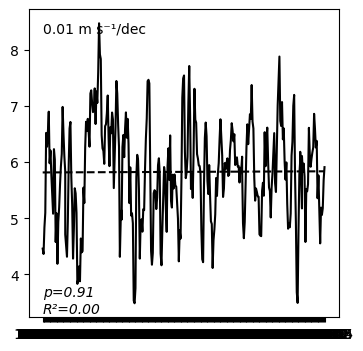

In [55]:
# Do the linear regression of the monthly mean zonal and meridional wind speeds analysis
fig = plt.figure(figsize=(4, 4))  # Increased the figure size

# Zonal component of the wind velocities: original time series
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh_avg, c='black', label='Whole Meander')

# Perform linear regression
slope_ugrd_wh, intercept_ugrd_wh, r_ugrd_wh, p_ugrd_wh, std_err_ugrd_wh = linregress(jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64'), jra_ugrd_wind_mon_mean_1993_2020_CP_region_wh_avg)

# Calculate regression line
reg_ugrd_wh = slope_ugrd_wh * jra_ugrd_wind_mon_mean_1993_2020_CP_region.initial_time1_months.astype('float64') + intercept_ugrd_wh

# Calculate R-squared value
r_squ_ugrd_wh = r_ugrd_wh ** 2

ax1.plot(jra_ugrd_wind_mon_mean_1993_2020_CP_region_time, reg_ugrd_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
coef_ugrd_wh_str = '{:.2f} $m$ $s^{-1}$/dec'.format(coef_ugrd_wh[0]*3.1536e+16*10)
p_ugrd_wh_str = 'p={:.2f}'.format(p_ugrd_wh)
r_squ_ugrd_wh_str = 'R\u00b2={:.2f}'.format(r_squ_ugrd_wh)

ax1.text(0, 8.5, coef_ugrd_wh_str, ha='left', va='top', color='black')
ax1.text(0, 3.8, p_ugrd_wh_str, ha='left', va='top', color='black', fontstyle='italic')
ax1.text(0, 3.5, r_squ_ugrd_wh_str, ha='left', va='top', color='black', fontstyle='italic')